In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_confusion_matrix
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#### Etapa 1: 
##### Quais são as características físico-químicas do vinho (branco) que impactam na nota de avalição sensorial (Quality) dos vinhos dessa região?

In [2]:
wine_white = pd.read_csv("./winequality-white.csv", sep=";")

In [3]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
wine_white.columns = wine_white.columns.str.strip().str.replace(' ', '_').str.lower()

In [6]:
wine_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   ph                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##### 1.	Definição da variável resposta

In [8]:
X = wine_white.iloc[:, wine_white.columns != 'quality']

y = wine_white['quality']

In [9]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [10]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

##### 2.	Análise Exploratória dos dados

In [11]:
wine_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
ph,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [12]:
pd.DataFrame(zip(wine_white.isnull().sum(), wine_white.isnull().sum()/len(wine_white)), columns=['Count', 'Proportion'], index=wine_white.columns)

,Count,Proportion
fixed_acidity,0,0.0
volatile_acidity,0,0.0
citric_acid,0,0.0
residual_sugar,0,0.0
chlorides,0,0.0
free_sulfur_dioxide,0,0.0
total_sulfur_dioxide,0,0.0
density,0,0.0
ph,0,0.0
sulphates,0,0.0


In [13]:
(wine_white['quality'].count() / wine_white.shape[0]) * 100

100.0

<AxesSubplot:>

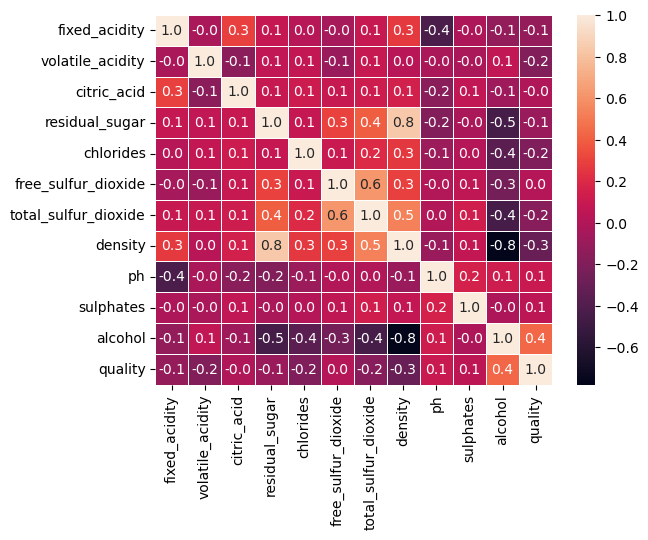

In [14]:
correlation = wine_white.corr()
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=0.6)
plot

In [15]:
sfs = SFS(
    RandomForestClassifier(),
    k_features=10,
    forward=True,
    floating=False,
    scoring="r2",
    cv=0,
)

sfs.fit(X, y)


df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
print(df_SFS_results)

                        feature_idx              cv_scores avg_score  \
1                              (7,)  [0.11168730327608822]  0.111687   
2                            (6, 7)   [0.9198123357001862]  0.919812   
3                         (0, 6, 7)   [0.9992189513217551]  0.999219   
4                      (0, 1, 6, 7)                  [1.0]       1.0   
5                   (0, 1, 2, 6, 7)                  [1.0]       1.0   
6                (0, 1, 2, 3, 6, 7)                  [1.0]       1.0   
7             (0, 1, 2, 3, 4, 6, 7)                  [1.0]       1.0   
8          (0, 1, 2, 3, 4, 6, 7, 8)                  [1.0]       1.0   
9       (0, 1, 2, 3, 4, 6, 7, 8, 9)                  [1.0]       1.0   
10  (0, 1, 2, 3, 4, 6, 7, 8, 9, 10)                  [1.0]       1.0   

                                        feature_names  
1                                          (density,)  
2                     (total_sulfur_dioxide, density)  
3      (fixed_acidity, total_sulfur_dio

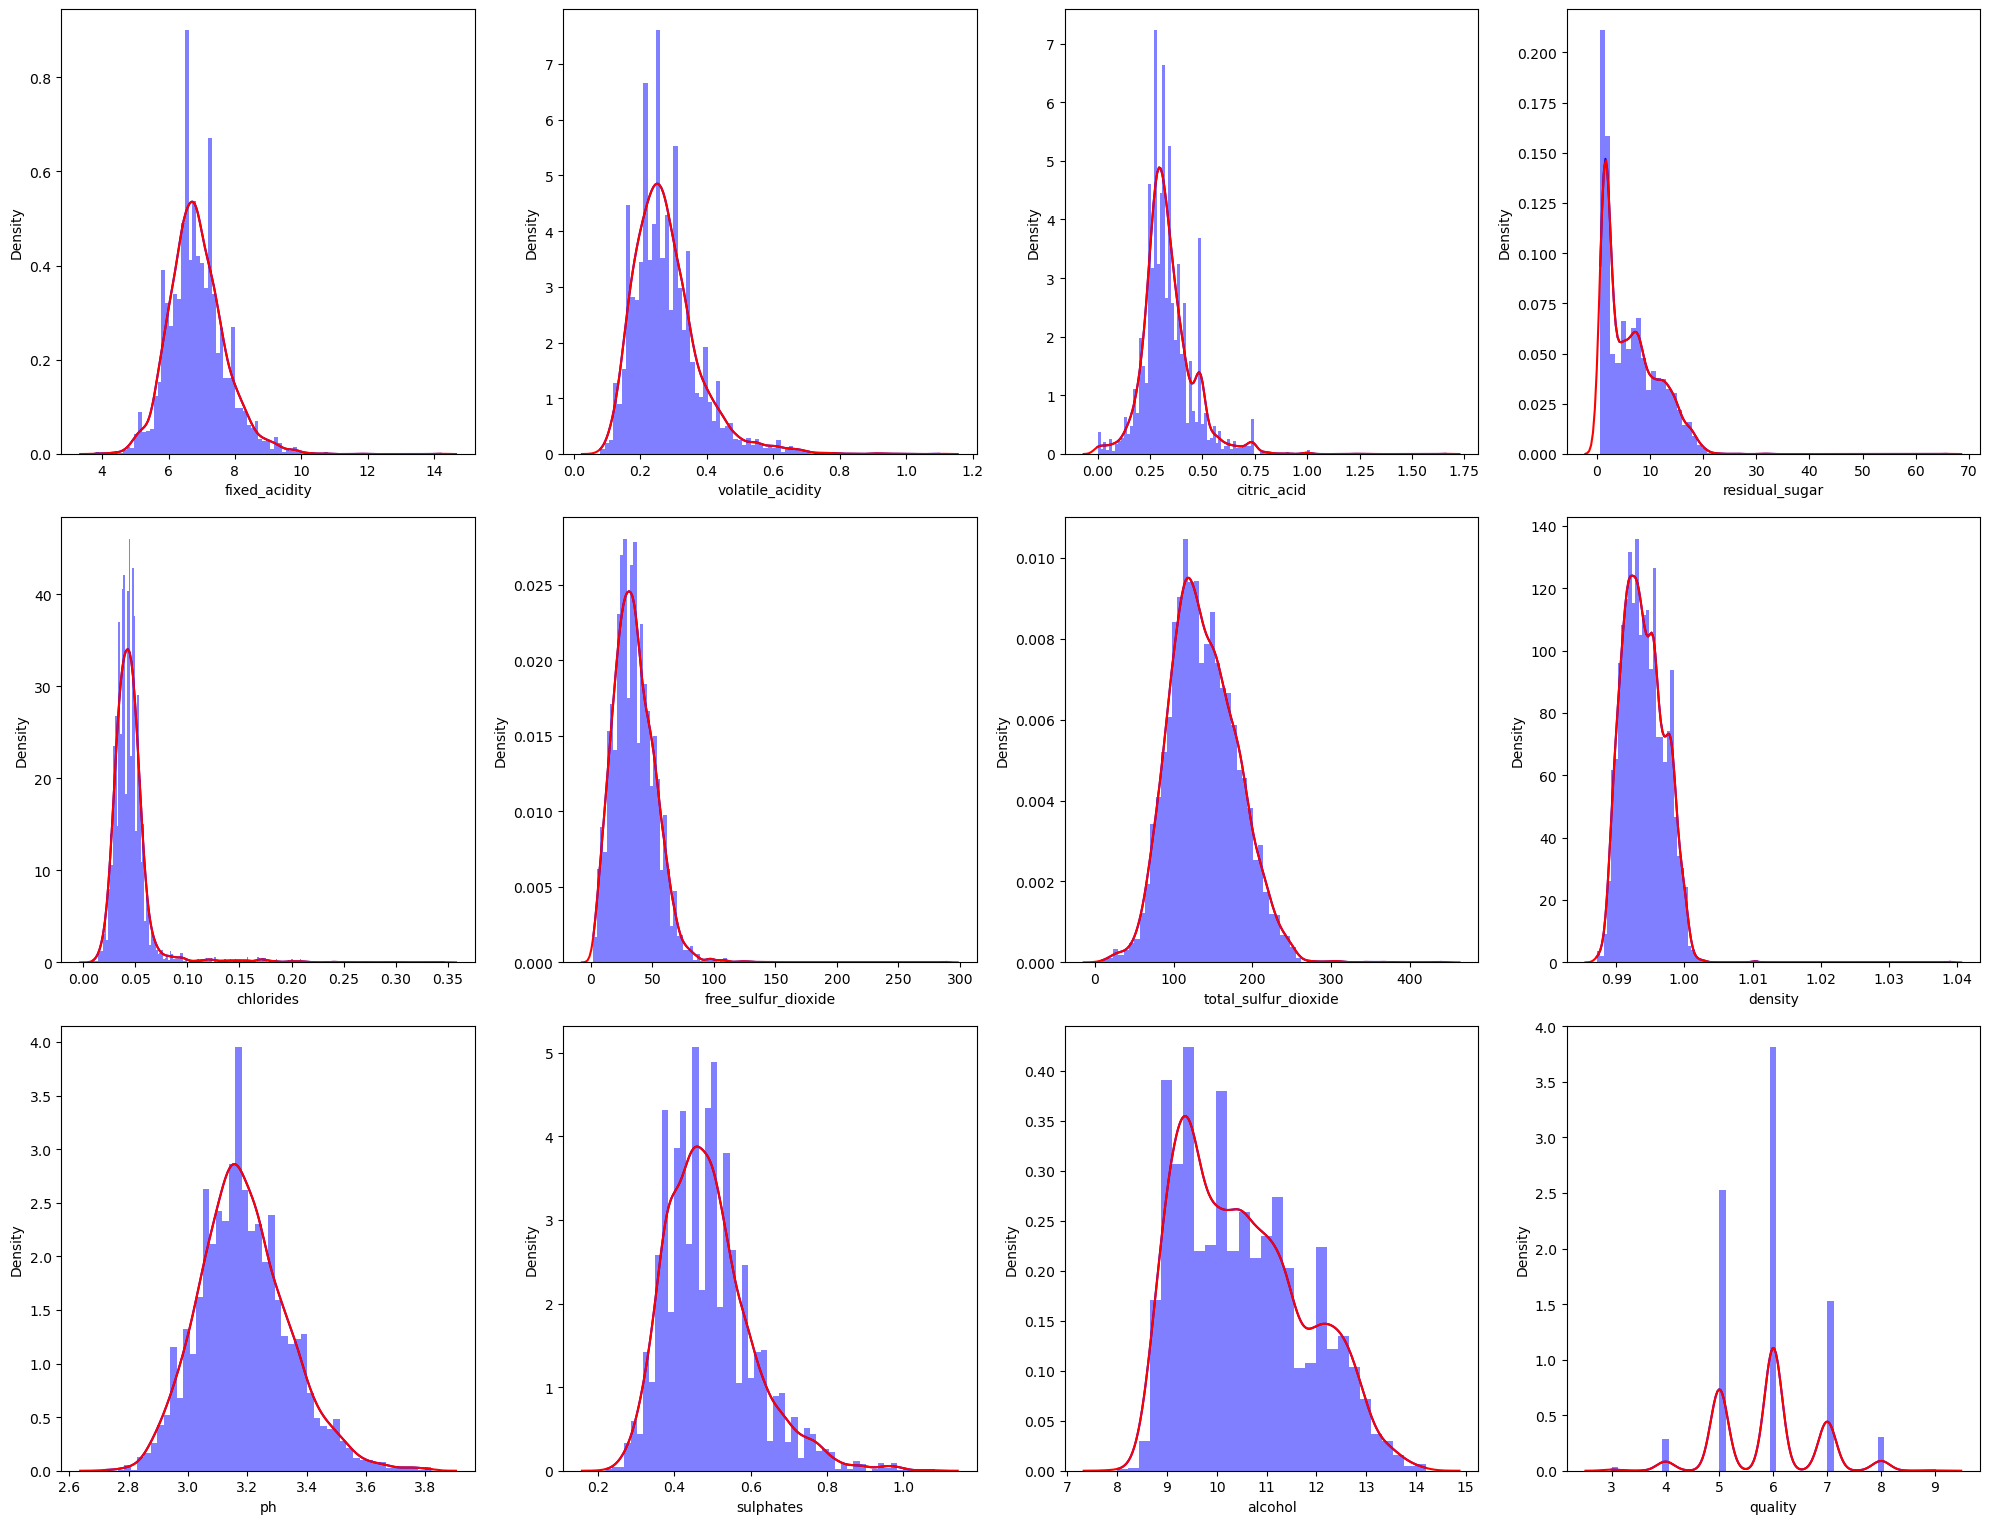

In [16]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.histplot(wine_white[col], color="blue", kde=True, stat="density", linewidth=0)
    sns.kdeplot(wine_white[col], color="red", warn_singular=False)
    count+=1
plt.tight_layout()
plt.show()

##### 3.	Exclusão de outliers, caso necessário (sempre explicando a opção) e a quantidade final após a exclusão.

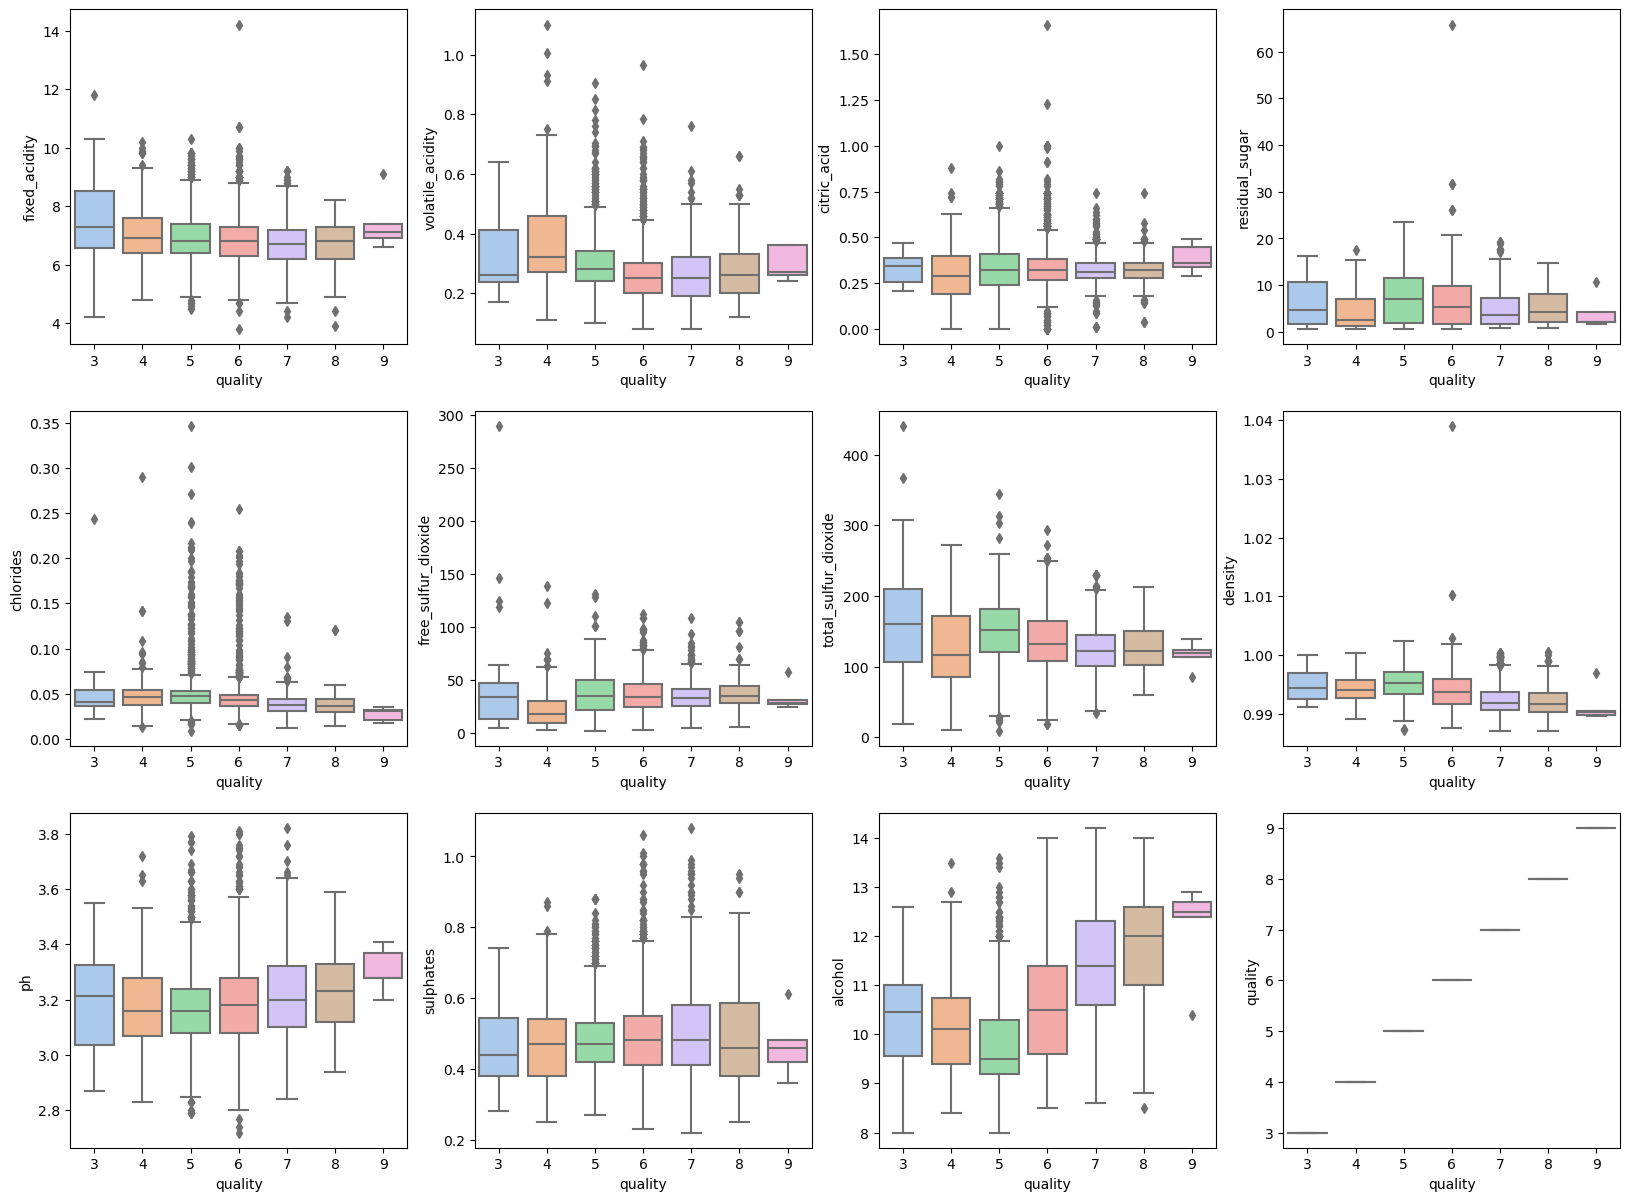

In [17]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.boxplot(data=wine_white, x="quality", y=col, palette="pastel")
    count+=1
plt.show()

In [18]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   ph                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [19]:
wine_white = wine_white[(np.abs(stats.zscore(wine_white)) < 1).all(axis=1)]

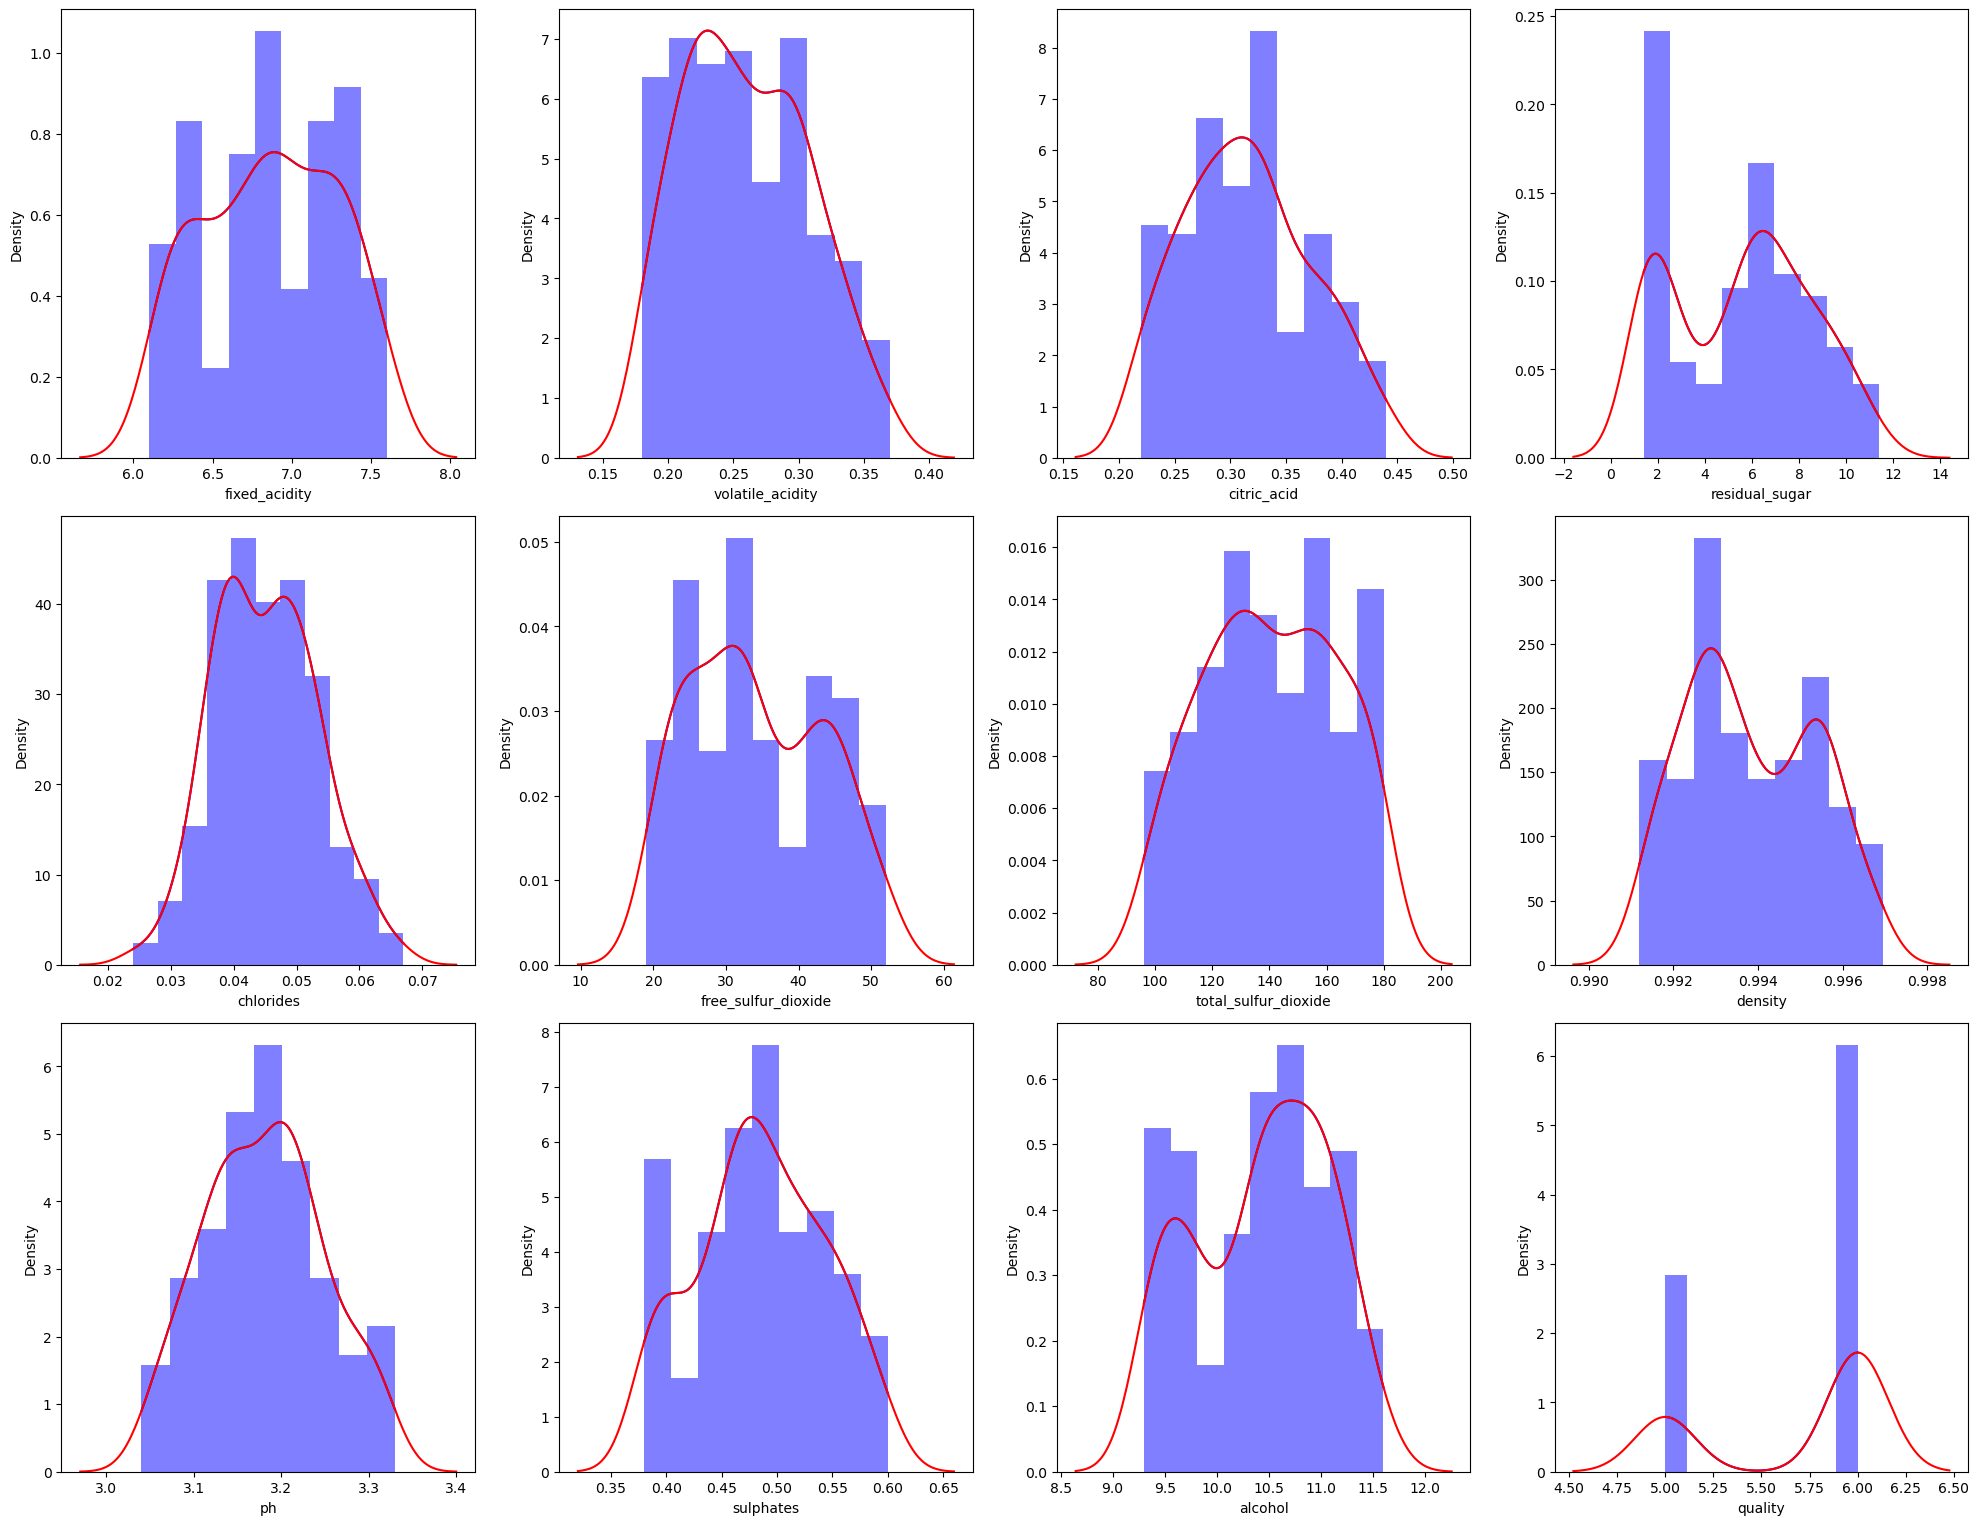

In [20]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.histplot(wine_white[col], color="blue", kde=True, stat="density", linewidth=0)
    sns.kdeplot(wine_white[col], color="red", warn_singular=False)
    count+=1
plt.tight_layout()
plt.show()

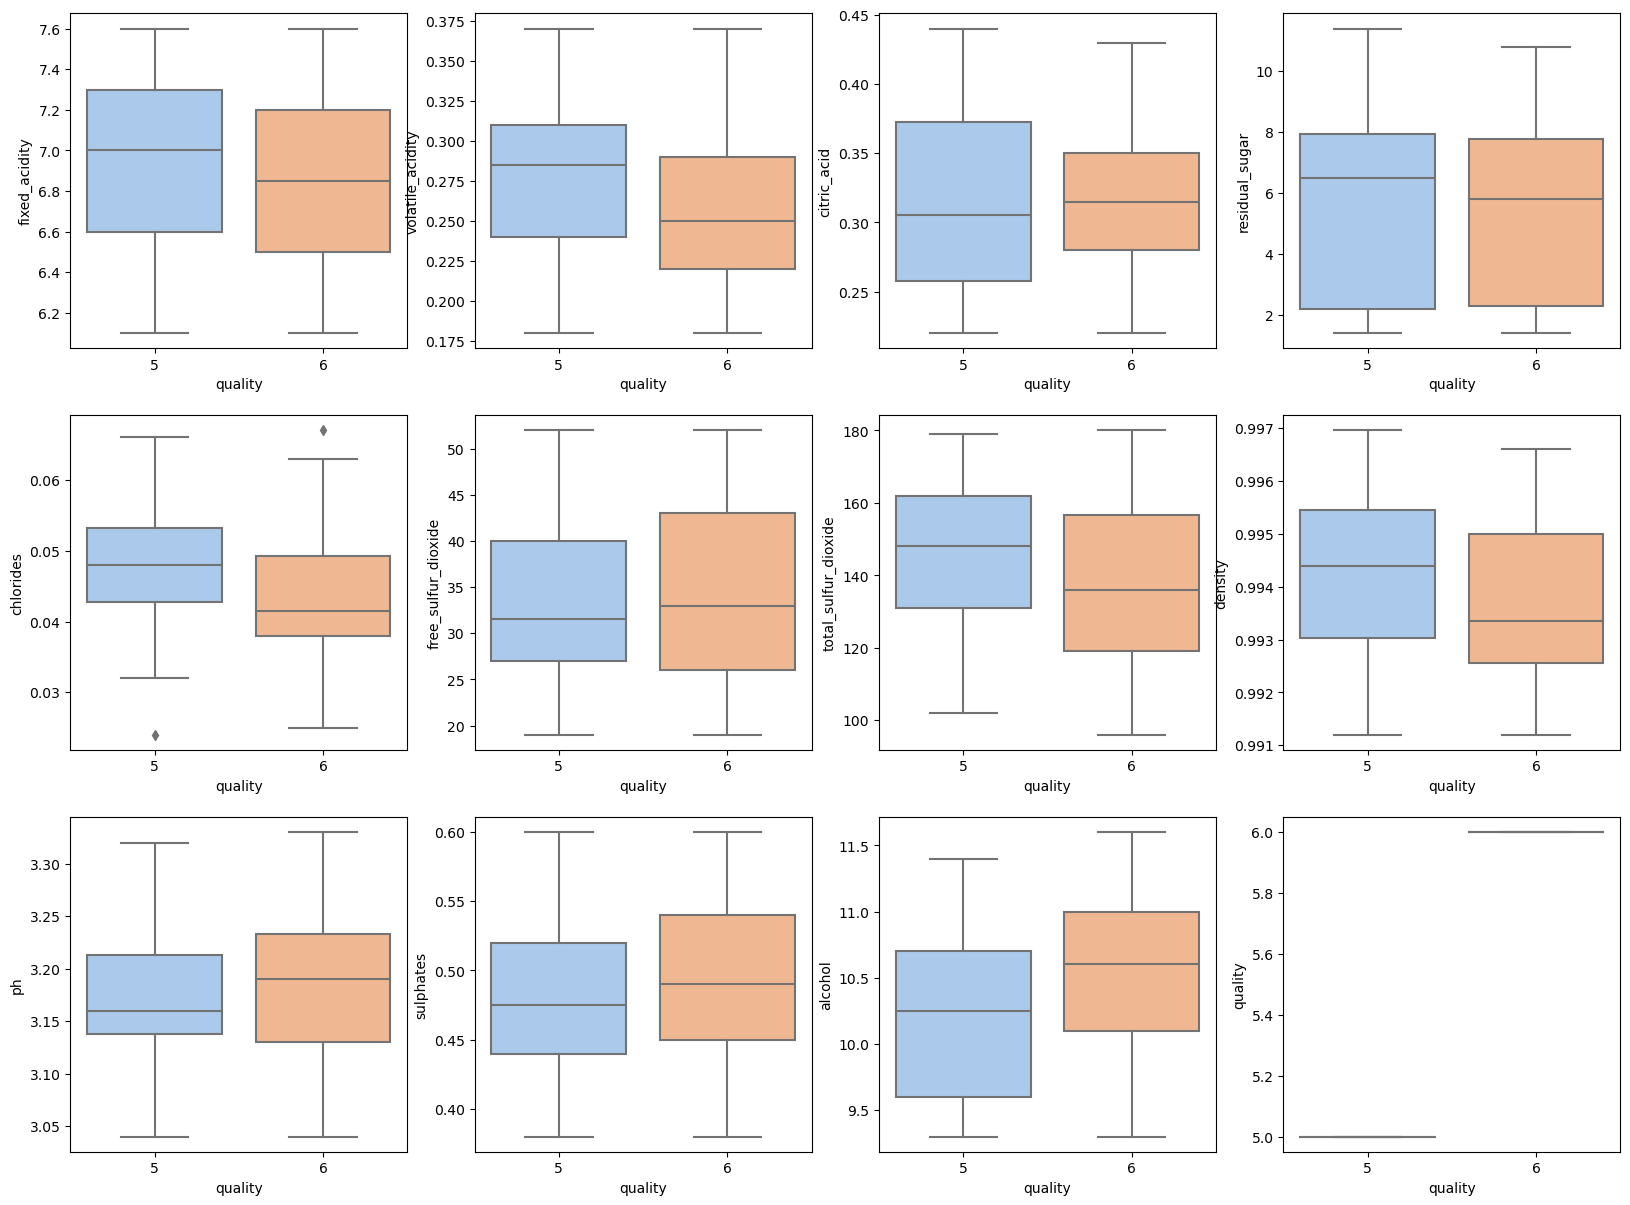

In [21]:
fig = plt.figure(figsize=[20, 20])
cols = wine_white.columns
count = 1
for col in cols:
    plt.subplot(4, 4, count)
    sns.boxplot(data=wine_white, x="quality", y=col, palette="pastel")
    count+=1
plt.show()

In [22]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 32 to 4851
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         216 non-null    float64
 1   volatile_acidity      216 non-null    float64
 2   citric_acid           216 non-null    float64
 3   residual_sugar        216 non-null    float64
 4   chlorides             216 non-null    float64
 5   free_sulfur_dioxide   216 non-null    float64
 6   total_sulfur_dioxide  216 non-null    float64
 7   density               216 non-null    float64
 8   ph                    216 non-null    float64
 9   sulphates             216 non-null    float64
 10  alcohol               216 non-null    float64
 11  quality               216 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 30.0 KB


##### 4.	Amostra de Treinamento dos modelos e Validação 

In [23]:
X = wine_white.iloc[:, wine_white.columns != 'quality']

y = wine_white['quality']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

X_train.shape, X_test.shape

((151, 11), (65, 11))

#### 5.	Padronização dos dados, caso necessário

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### 7.	Com a métrica correta faça a comparação entre os diferentes algoritmos e qual foi o melhor entre eles.

In [26]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
pred = model_lr.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('Accuracy : ', 100 * accuracy)

Accuracy :  76.92307692307693


In [28]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 7  9]
 [ 6 43]]


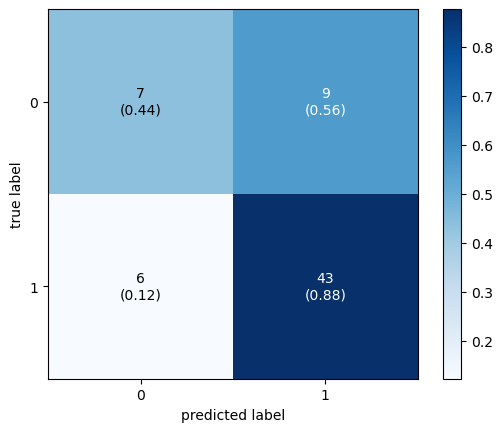

In [29]:
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.54      0.44      0.48        16
           6       0.83      0.88      0.85        49

    accuracy                           0.77        65
   macro avg       0.68      0.66      0.67        65
weighted avg       0.76      0.77      0.76        65



In [31]:
model_svc = SVC(kernel="rbf")
model_svc.fit(X_train, y_train)

SVC()

In [32]:
pred = model_svc.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('Accuracy : ', 100 * accuracy)

Accuracy :  76.92307692307693


In [33]:
cm = confusion_matrix(y_test, model_svc.predict(X_test))
print(cm)

[[ 7  9]
 [ 6 43]]


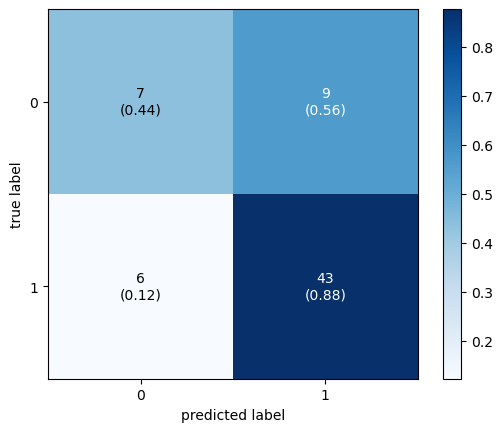

In [34]:
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.54      0.44      0.48        16
           6       0.83      0.88      0.85        49

    accuracy                           0.77        65
   macro avg       0.68      0.66      0.67        65
weighted avg       0.76      0.77      0.76        65



In [36]:
model_knn = KNeighborsClassifier(n_neighbors=20)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [37]:
pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy : ', 100 * accuracy)

Accuracy :  73.84615384615385


In [38]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 5 11]
 [ 6 43]]


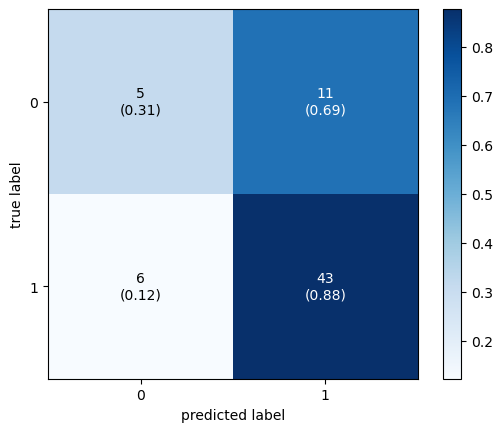

In [39]:
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.45      0.31      0.37        16
           6       0.80      0.88      0.83        49

    accuracy                           0.74        65
   macro avg       0.63      0.60      0.60        65
weighted avg       0.71      0.74      0.72        65

